In [1]:
import numpy as np
import CRNS_library as CRNS_lib
import time
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import CRNS_optimizer as CRNS_opt
from scipy.optimize import curve_fit


def func(x, p1, p2):
    return p1 * np.cos(p2 * x) + p2 * np.sin(p1 * x)
print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 


Not a file to run, only methods included here.

Block completed at time:                       10:32:18 on 2024-10-04


In [2]:
src_path = 'D:/Projekte_ongoing/CRNS_ML/'
##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/JUNG1_Data_UTC.TXT'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Incoming'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Jung = new_data.set_index('DateTime')

src_path = 'D:/Projekte_ongoing/CRNS_ML/'
##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/OULU_1h_UTC.TXT'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Oulu'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Oulu = new_data.set_index('DateTime')


src_path = 'D:/Projekte_ongoing/CRNS_ML/'
##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/APTY_1h_UTC.TXT'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Apty'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Apty = new_data.set_index('DateTime')

src_path = 'D:/Projekte_ongoing/CRNS_ML/'
##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/AthensR8.53Alt260 m.TXT'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Athens'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Athens = new_data.set_index('DateTime')


src_path = 'D:/Projekte_ongoing/CRNS_ML/'
##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/MXCO_1h_UTC8.28Alt2274m.TXT'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Mxco'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Mxco = new_data.set_index('DateTime')

print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 



Block completed at time:                       10:32:19 on 2024-10-04


In [3]:

#ID: 33 Reading: MEBCK001
MEBCK001_site_ID = 33
ii=33
nn="MEBCK001"
bd = 1.31
#for ii, nn in enumerate(sites_names[59:-2], start=59):
print("ID:",ii, "Reading:",nn)
No = 1205

psi = 0.7
omega = 0.0054
beta_ref = -0.0074
beta = beta_ref

ID: 33 Reading: MEBCK001


In [4]:
beta=beta_ref

## Schäfertal ID 3 removed; and columns renamed; asterisk remarks removed; BUC001 data gaps were removed
fname='EU_Study_sites.csv'
fname="./Scaling/COSMOS_Europe_Data/Additional_information.csv"
site_info = pd.read_csv(fname)
fname="./Scaling/COSMOS_Europe_Data/General_information.csv"
site_general_info = pd.read_csv(fname)
sites_names = site_info.StationID.to_list()
CutoffRigidity = site_info.CutoffRigidity.to_list()
sites_Bulkdensity = site_info.Bulkdensity.to_list()
sites_Altitude = site_general_info.Altitude.to_list()
sites_Precip = site_general_info.Meanannualprecipitation.to_list()
sites_Temperature = site_general_info.Meanairtemperature.to_list()
sites_lat = site_general_info.Latitude.to_list()
dfi = pd.DataFrame({
    'StationID': sites_names,
    'CutoffRigidity': CutoffRigidity,
    'sites_Precip': sites_Precip,
    'sites_Temperature': sites_Temperature,
    'Bulkdensity': sites_Bulkdensity,
    'Altitude': sites_Altitude
})

# Add new columns (beta, omega, psi) with initial values (you can update these later)
dfi['beta'] = np.nan
dfi['beta_sd'] = np.nan
dfi['beta_mae'] = np.nan
dfi['beta_rmse'] = np.nan
dfi['beta_oulu'] = np.nan
dfi['beta_apty'] = np.nan
dfi['beta_mxco'] = np.nan
dfi['beta_athens'] = np.nan
dfi['omega'] = np.nan
dfi['omega_sd'] = np.nan
dfi['omega_oulu'] = np.nan
dfi['omega_apty'] = np.nan
dfi['omega_mxco'] = np.nan
dfi['omega_athens'] = np.nan
dfi['omega_mae'] = np.nan
dfi['omega_rmse'] = np.nan
dfi['psi'] = np.nan
dfi['psi_sd'] = np.nan
dfi['psi_oulu'] = np.nan
dfi['psi_apty'] = np.nan
dfi['psi_athens'] = np.nan
dfi['psi_mxco'] = np.nan
dfi['psi_mae'] = np.nan
dfi['psi_rmse'] = np.nan
dfi['BetaDesilets'] = np.nan
dfi['mean_P'] = np.nan

DF = CRNS_lib.load_EU_data(src_path+'/Scaling/COSMOS_Europe_Data/',nn)
DF['Abs_h'] = CRNS_opt.Absolute_conv(DF.RH, DF.TEMP)
#resample to 1 hour exactly, for merging with 1h inc. radiation
DF = DF.resample('1H').mean()

DF = DF.join(Jung)
DF = DF.join(Apty)
DF = DF.join(Oulu)
DF = DF.join(Athens)
DF = DF.join(Mxco)

#calculate relative scaling for inc. radiation
DF["Incoming"] = DF["Incoming"]/np.nanmean(DF["Incoming"])#Jung
DF["Apty"] = DF["Apty"]/np.nanmean(DF["Apty"])
DF["Oulu"] = DF["Oulu"]/np.nanmean(DF["Oulu"])
DF["Mxco"] = DF["Mxco"]/np.nanmean(DF["Mxco"])
DF["Athens"] = DF["Athens"]/np.nanmean(DF["Athens"])


In [5]:
print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 


Block completed at time:                       10:32:20 on 2024-10-04


In [6]:
#counts when SWC is observed after correction
beta=beta_ref
#Npih = (0.0808/(SWC / bd + 0.115) + 0.372 )* No

731.288603128814
0.3


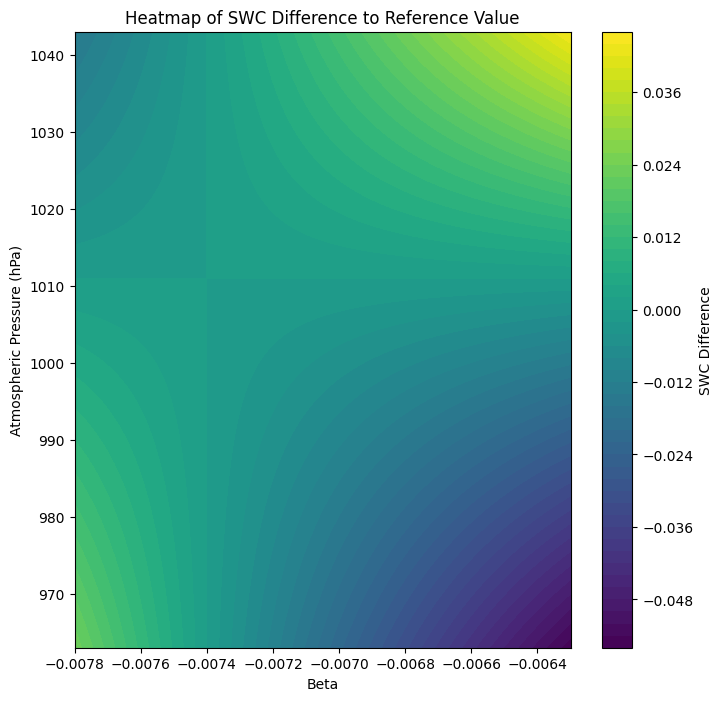


Block completed at time:                       10:32:22 on 2024-10-04


In [7]:

# Constants

pref = 1011  # Reference Atmospheric pressure in hPa
ense_size = 500
# Define ranges for P and beta
P_range = np.linspace(963, 1043, ense_size)
beta_range = np.linspace(-0.0063, -0.0078, ense_size)

# Define ranges for Inc and psi
# Calculate reference Npih and SWC
P_ref = pref  # Reference Atmospheric pressure
SWC_ref = 0.3  # Reference SWC value
cor_ref = CRNS_opt.corr_exp_pressure(P_ref, pref, beta_ref)
Npih_ref= (0.0808/(SWC_ref / bd + 0.115) + 0.372 )* No
print(Npih_ref)
print(CRNS_opt.Calculate_swc_from_Npih(Npih_ref, No, bd))


#  Min = 963.6
#  Max = 1043.6
#  Standard Deviation = 8.980325633854576
#  95th Percentile = 1026.1

# Initialize a matrix to store SWC differences
SWC_diff = np.zeros((len(P_range), len(beta_range)))

# Calculate SWC for each combination of P and beta
for i, P in enumerate(P_range):
    for j, beta in enumerate(beta_range):
        ##Calculate observed neutron flux using beta:
        cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
        N_ij = Npih_ref / cor_coeff
        ## Two SWC will be possibly estimated.
        # a) true SWC (0.1, 0.2 or 0.3)
        # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
        #Only store plot the difference
        SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij*cor_coeff, No, bd)
        #Calculate SWC with real beta value:
        cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
        SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij*cor_coeff_case, No, bd)
        SWC_diff[i, j] = SWC_est - SWC_true

# Plot the heatmap
plt.figure(figsize=(8, 8))
plt.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='viridis')
plt.colorbar(label='SWC Difference')
plt.xlabel('Beta')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.title('Heatmap of SWC Difference to Reference Value')
plt.show()

print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 

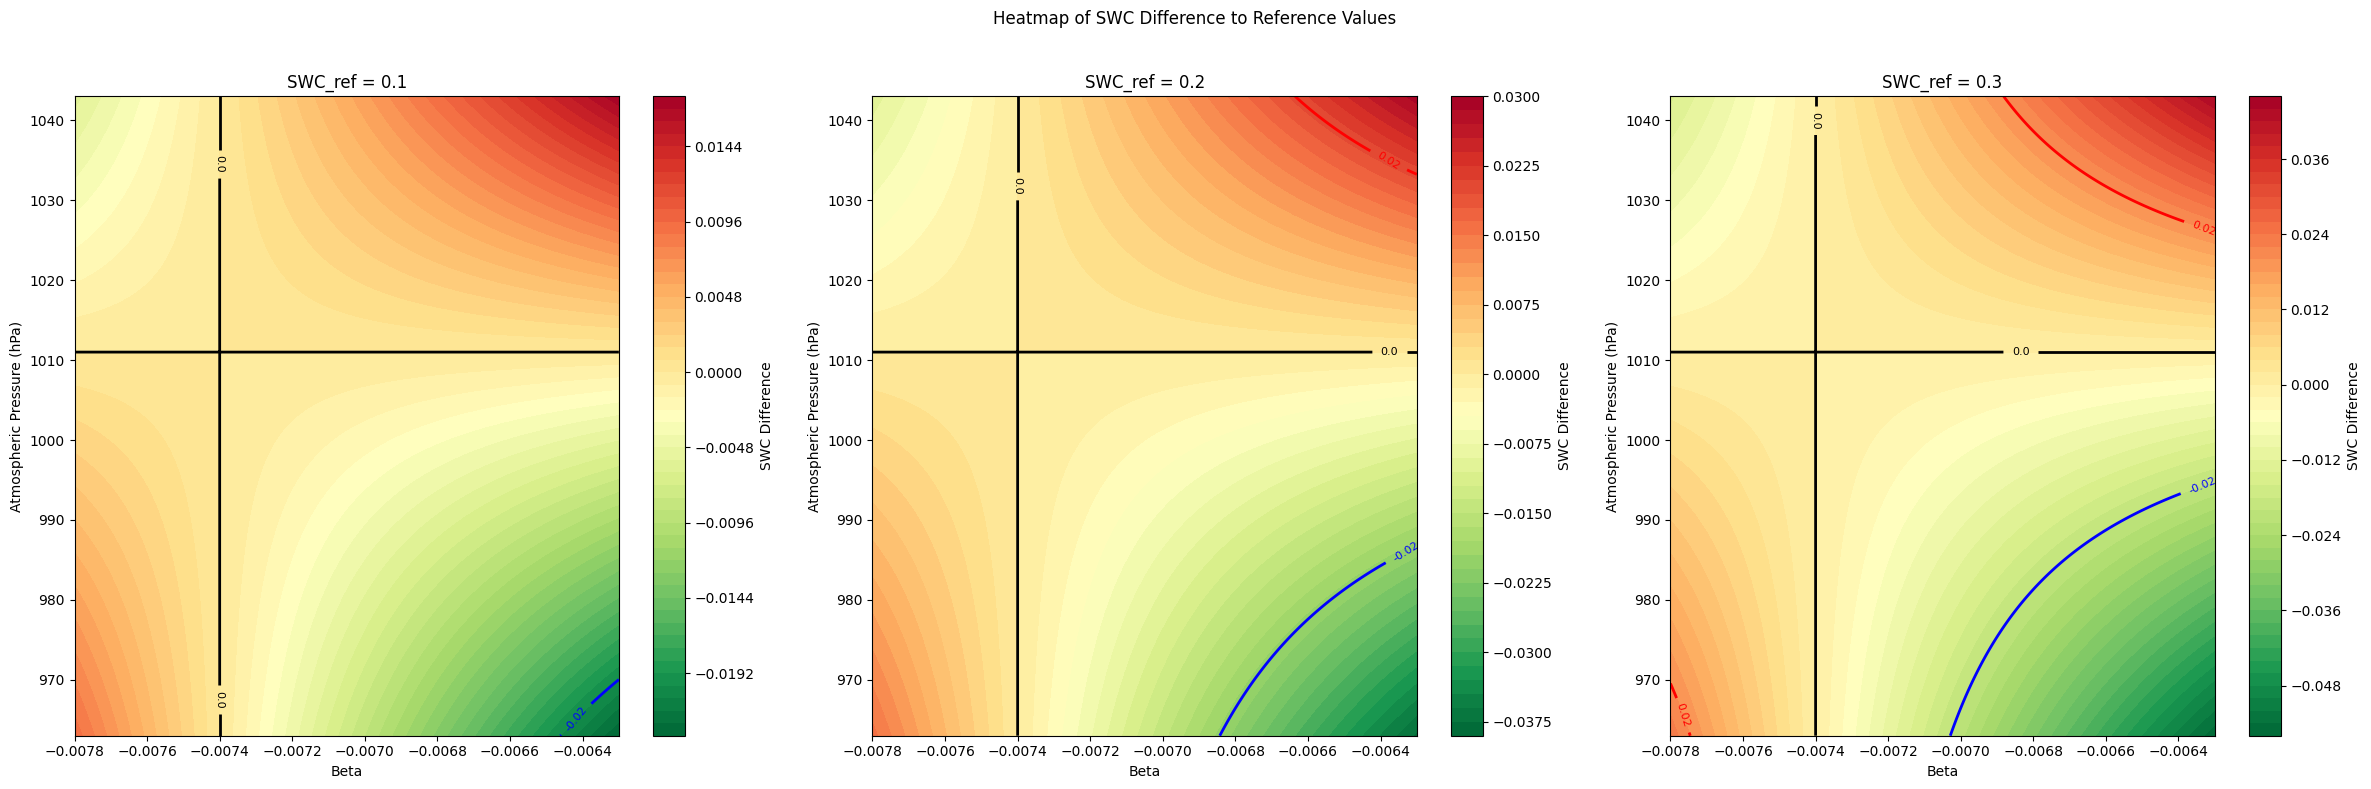


Block completed at time:                       10:32:25 on 2024-10-04


In [8]:
# Initialize subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Reference SWC values
SWC_refs = [0.1, 0.2, 0.3]
titles = ['SWC_ref = 0.1', 'SWC_ref = 0.2', 'SWC_ref = 0.3']

for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[idx]
    c = ax.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=8)

    ax.set_xlabel('Beta')
    ax.set_ylabel('Atmospheric Pressure (hPa)')
    ax.set_title(titles[idx])

plt.suptitle('Heatmap of SWC Difference to Reference Values')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 

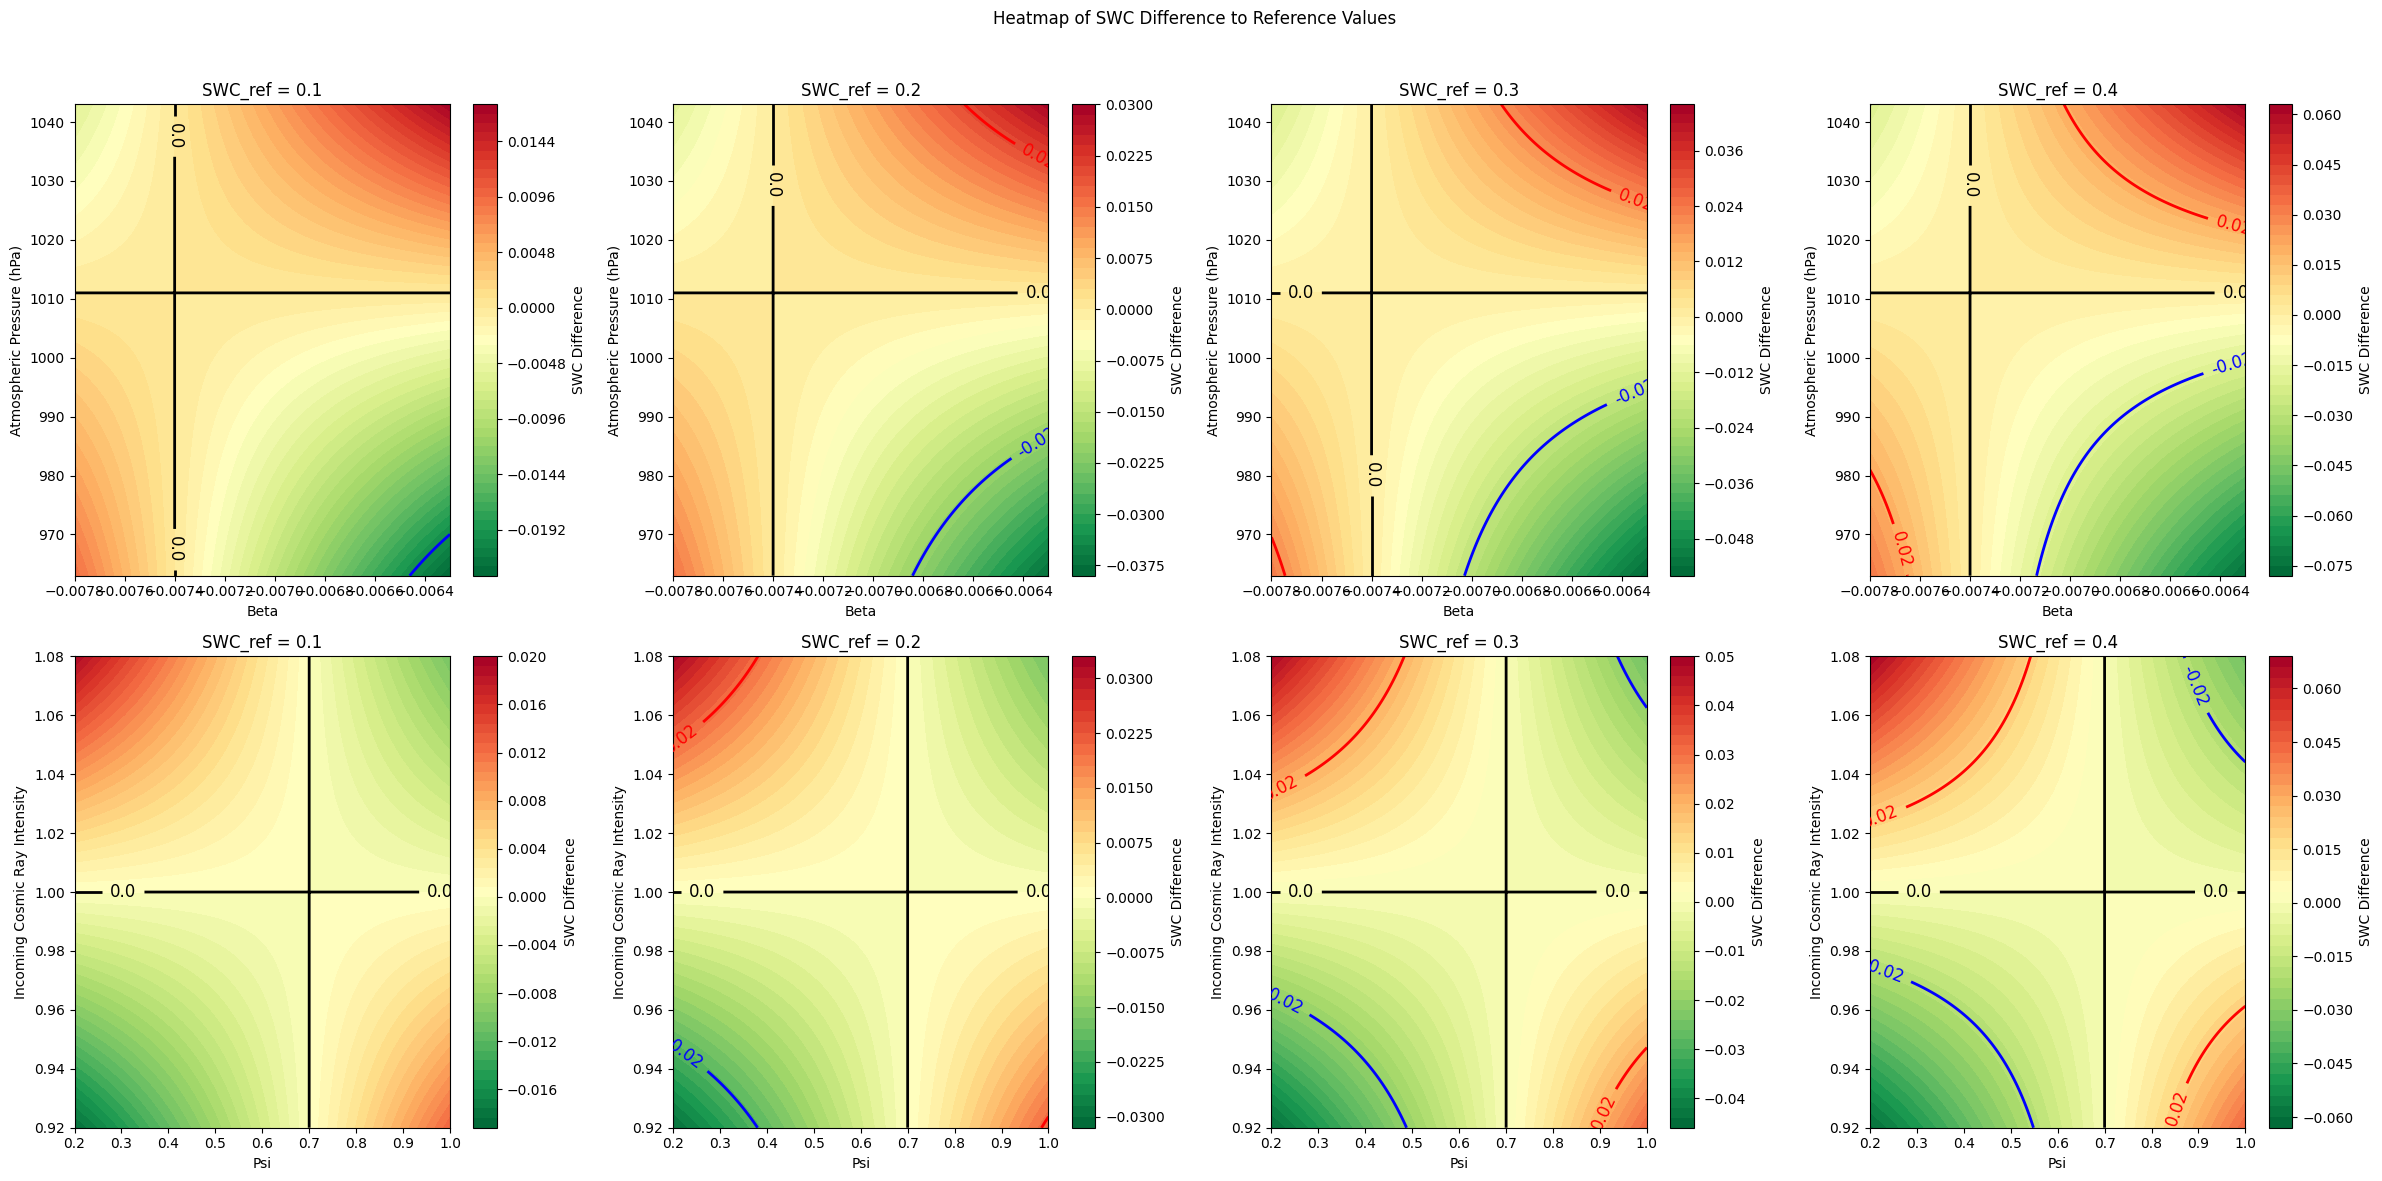


Block completed at time:                       10:32:33 on 2024-10-04


In [9]:

Inc_ref = 1.0  # Reference incoming cosmic ray intensity
psi_ref = 0.7

# Define ranges for Inc and psi
Inc_range = np.linspace(0.92, 1.08, ense_size)

psi_range = np.linspace(0.2, 1.0, ense_size)

# Initialize subplots
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Reference SWC values
SWC_refs = [0.1, 0.2, 0.3, 0.4]
titles = ['SWC_ref = 0.1', 'SWC_ref = 0.2', 'SWC_ref = 0.3','SWC_ref = 0.4']

# Plot for beta and P
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[0, idx]
    c = ax.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Beta')
    ax.set_ylabel('Atmospheric Pressure (hPa)')
    ax.set_title(titles[idx])

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(Inc_range), len(psi_range)))

    # Calculate SWC for each combination of Inc and psi
    for i, Inc in enumerate(Inc_range):
        for j, psi in enumerate(psi_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi_ref)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong psi using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

            
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[1, idx]
    c = ax.contourf(psi_range, Inc_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(psi_range, Inc_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Psi')
    ax.set_ylabel('Incoming Cosmic Ray Intensity')
    ax.set_title(titles[idx])

plt.suptitle('Heatmap of SWC Difference to Reference Values')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 


#pngname="./sensitivity.png"
#print("Save file as "+pngname)
#fig.savefig(pngname, bbox_inches='tight')

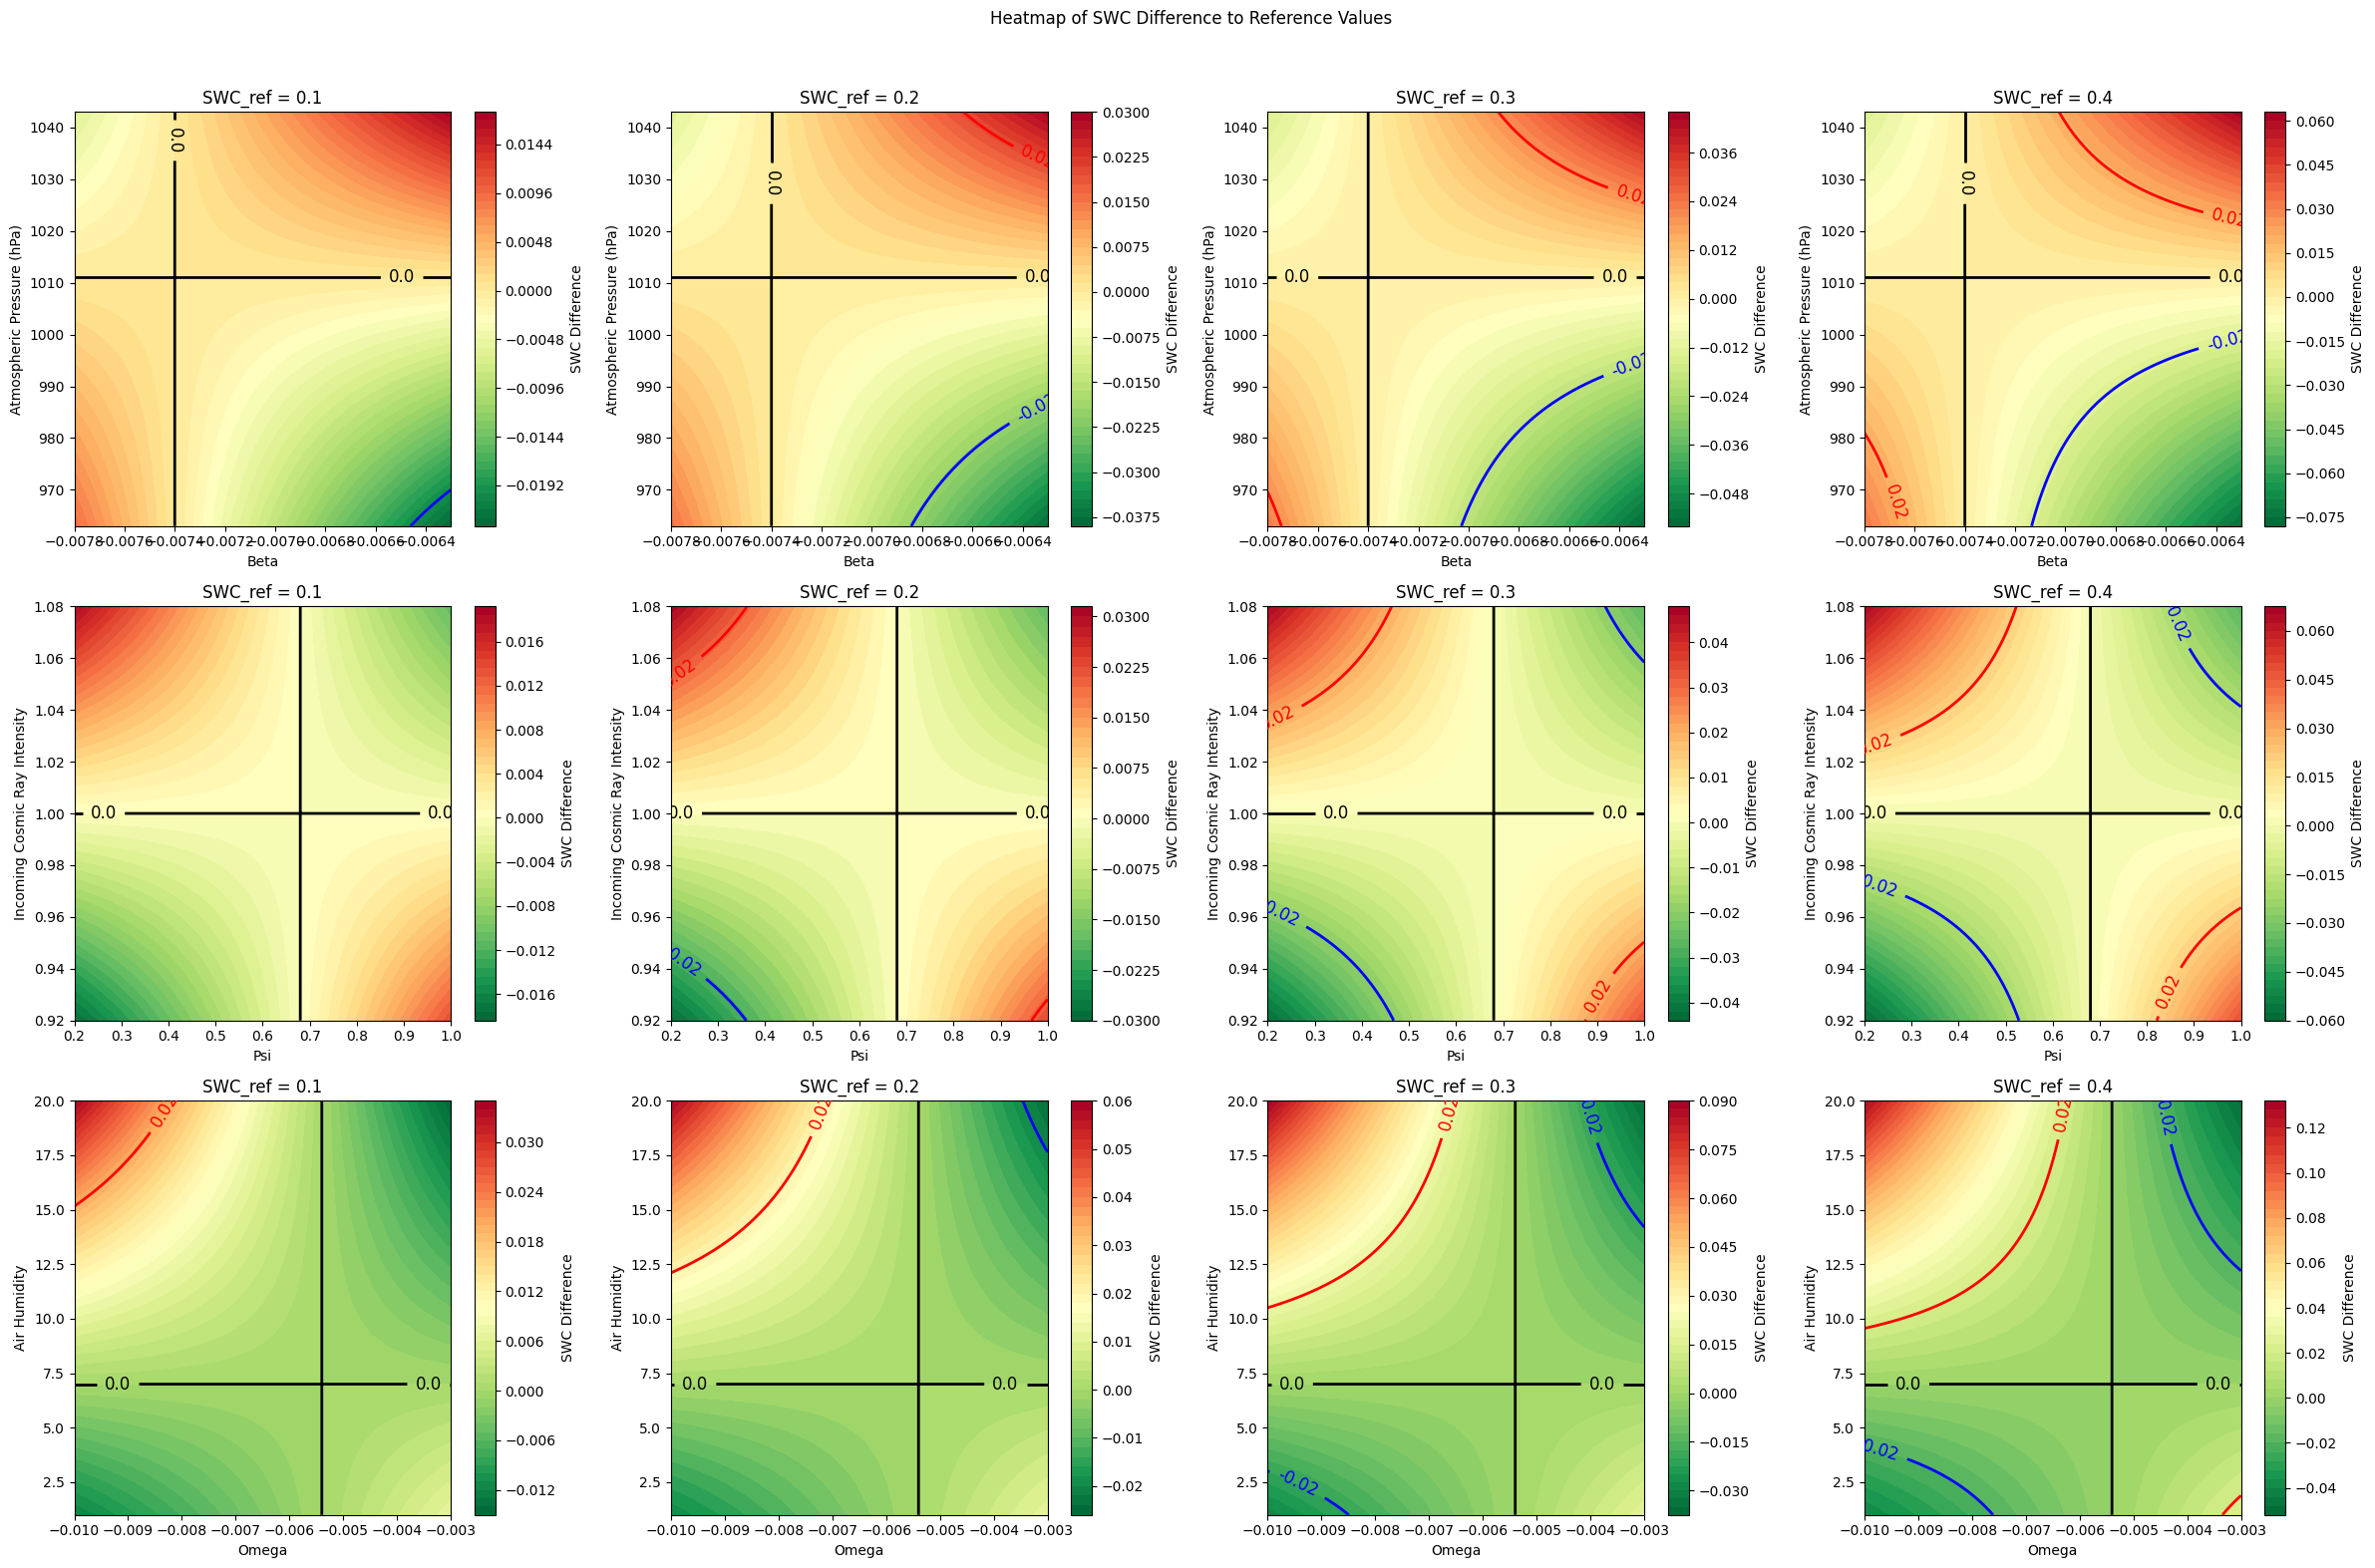


Block completed at time:                       10:32:45 on 2024-10-04


In [10]:

Inc_ref = 1.0  # Reference incoming cosmic ray intensity

psi_ref = 0.68
omega_ref = -0.0054
abs_ref = 7.0
ense_size = 500

# Define ranges for Inc and psi
Inc_range = np.linspace(0.92, 1.08, ense_size)
abs_range = np.linspace(1, 20, ense_size)

psi_range = np.linspace(0.2, 1.0, ense_size)
omega_range = np.linspace(-0.003, -0.01, ense_size)

# Initialize subplots
fig, axes = plt.subplots(3, 4, figsize=(24, 16))

# Reference SWC values
SWC_refs = [0.1, 0.2, 0.3, 0.4]
titles = ['SWC_ref = 0.1', 'SWC_ref = 0.2', 'SWC_ref = 0.3','SWC_ref = 0.4']

# Plot for beta and P
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[0, idx]
    c = ax.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Beta')
    ax.set_ylabel('Atmospheric Pressure (hPa)')
    ax.set_title(titles[idx])

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((ense_size,ense_size))

    # Calculate SWC for each combination of Inc and psi
    for i, Inc in enumerate(Inc_range):
        for j, psi in enumerate(psi_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi_ref)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong psi using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

    # Plot the heatmap
    ax = axes[1, idx]
    c = ax.contourf(psi_range, Inc_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(psi_range, Inc_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Psi')
    ax.set_ylabel('Incoming Cosmic Ray Intensity')
    ax.set_title(titles[idx])

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((ense_size,ense_size))

    # Calculate SWC for each combination of Inc and psi
    for i, abs_val in enumerate(abs_range):
        for j, omega in enumerate(omega_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega_ref)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong psi using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

            
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[2, idx]
    c = ax.contourf(omega_range, abs_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(omega_range, abs_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Omega')
    ax.set_ylabel('Air Humidity')
    ax.set_title(titles[idx])

plt.suptitle('Heatmap of SWC Difference to Reference Values')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 

#pngname="./sensitivityA.png"
#print("Save file as "+pngname)
#fig.savefig(pngname, bbox_inches='tight')

C:\Users\baatz\AppData\Local\Temp\ipykernel_12828\2427269530.py:61: UserWarning: The following kwargs were not used by contour: 'linestyle'
  contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
C:\Users\baatz\AppData\Local\Temp\ipykernel_12828\2427269530.py:99: UserWarning: The following kwargs were not used by contour: 'linestyle'
  contour_lines = ax.contour(psi_range, Inc_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
C:\Users\baatz\AppData\Local\Temp\ipykernel_12828\2427269530.py:141: UserWarning: The following kwargs were not used by contour: 'linestyle'
  contour_lines = ax.contour(omega_range, abs_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])


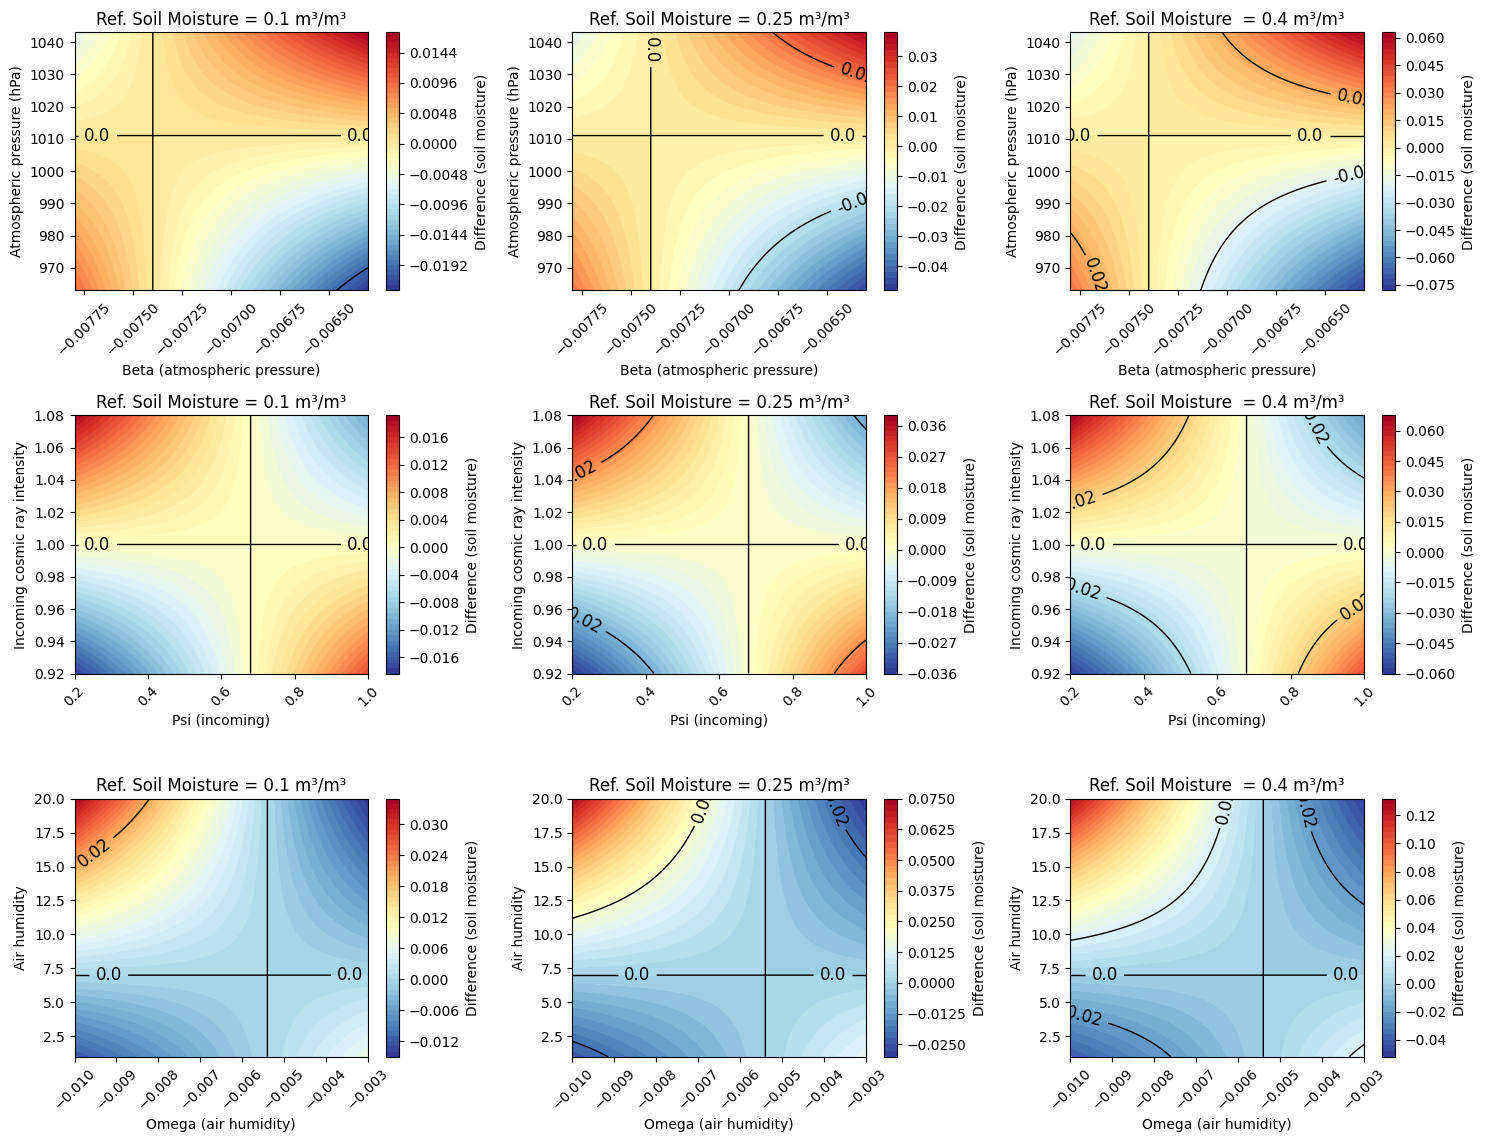

Save file as ./sensitivityb.png


In [11]:

Inc_ref = 1.0  # Reference incoming cosmic ray intensity

psi_ref = 0.68
omega_ref = -0.0054
abs_ref = 7.0
ense_size = 500

# Define ranges for Inc and psi
Inc_range = np.linspace(0.92, 1.08, ense_size)
abs_range = np.linspace(1, 20, ense_size)

psi_range = np.linspace(0.2, 1.0, ense_size)
omega_range = np.linspace(-0.003, -0.01, ense_size)

# Initialize subplots
#fig, axes = plt.subplots(3, 4, figsize=(24, 16))
#SWC_refs = [0.1, 0.2, 0.3, 0.4]
#titles = ['SWC_ref = 0.1', 'SWC_ref = 0.2', 'SWC_ref = 0.3','SWC_ref = 0.4']

# Initialize subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
SWC_refs = [0.1, 0.25,  0.4]
titles = ['Ref. Soil Moisture = 0.1 m³/m³', 'Ref. Soil Moisture = 0.25 m³/m³', 'Ref. Soil Moisture  = 0.4 m³/m³']

# Plot for beta and P
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[0, idx]
    c = ax.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='RdYlBu_r')
    fig.colorbar(c, ax=ax, label='Difference (soil moisture)')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    ax.set_xlabel('Beta (atmospheric pressure)')
    ax.set_ylabel('Atmospheric pressure (hPa)')
    ax.set_title(titles[idx])

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((ense_size,ense_size))

    # Calculate SWC for each combination of Inc and psi
    for i, Inc in enumerate(Inc_range):
        for j, psi in enumerate(psi_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi_ref)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong psi using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

    # Plot the heatmap
    ax = axes[1, idx]
    c = ax.contourf(psi_range, Inc_range, SWC_diff, levels=50, cmap='RdYlBu_r')
    fig.colorbar(c, ax=ax, label='Difference (soil moisture)')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(psi_range, Inc_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    ax.set_xlabel('Psi (incoming)')
    ax.set_ylabel('Incoming cosmic ray intensity')
    ax.set_title(titles[idx])

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((ense_size,ense_size))

    # Calculate SWC for each combination of Inc and psi
    for i, abs_val in enumerate(abs_range):
        for j, omega in enumerate(omega_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega_ref)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong psi using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

            
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[2, idx]
    c = ax.contourf(omega_range, abs_range, SWC_diff, levels=50, cmap='RdYlBu_r')
    fig.colorbar(c, ax=ax, label='Difference (soil moisture)')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(omega_range, abs_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Omega (air humidity)')
    ax.set_ylabel('Air humidity')
    ax.set_title(titles[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



pngname="./sensitivityb.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')



In [12]:
# Function to print ranges, standard deviation, and 95th percentiles of individual columns
def print_column_statistics(df):
    for column in df.columns:
        min_val = df[column].min()
        max_val = df[column].max()
        std_dev = df[column].std()
        percentile_05 = df[column].quantile(0.05)
        percentile_50 = df[column].quantile(0.50)
        percentile_95 = df[column].quantile(0.95)
        print(f"Column {column}:")
        print(f"  Min = {min_val}")
        print(f"  Max = {max_val}")
        print(f"   5th Percentile = {percentile_05}")
        print(f"  50th Percentile = {percentile_50}")
        print(f"  95th Percentile = {percentile_95}")
        print()

# Call the function
print_column_statistics(DF)

Column MOD:
  Min = 493.0
  Max = 1178.0
   5th Percentile = 637.0
  50th Percentile = 760.0
  95th Percentile = 925.0

Column Pressure:
  Min = 963.6
  Max = 1043.6
   5th Percentile = 995.9
  50th Percentile = 1011.8
  95th Percentile = 1026.1

Column TEMP:
  Min = -13.5
  Max = 39.2
   5th Percentile = 0.4
  50th Percentile = 10.5
  95th Percentile = 23.2

Column RH:
  Min = 17.7
  Max = 96.9
   5th Percentile = 43.6
  50th Percentile = 78.7
  95th Percentile = 91.8

Column NeutronCount_Slow_Cum1h:
  Min = 295.0
  Max = 972.0
   5th Percentile = 393.0
  50th Percentile = 458.0
  95th Percentile = 534.0

Column SOILM:
  Min = 0.0627472044735024
  Max = 0.4401516084355291
   5th Percentile = 0.10794027950115437
  50th Percentile = 0.24798796804233655
  95th Percentile = 0.338631387064937

Column Abs_h:
  Min = 1.0917477090919352
  Max = 19.79231133396776
   5th Percentile = 3.9988676690633675
  50th Percentile = 7.243359208124988
  95th Percentile = 12.484442714765475

Column Incoming

-0.0078
Date
2011-02-07 14:00:00    0.997401
2011-02-07 15:00:00    0.989652
2011-02-07 16:00:00    0.993479
2011-02-07 17:00:00    0.997185
2011-02-07 18:00:00    0.997449
                         ...   
2021-06-06 17:00:00    0.991561
2021-06-06 18:00:00    0.991406
2021-06-06 19:00:00    0.992671
2021-06-06 20:00:00    0.992520
2021-06-06 21:00:00    0.991872
Freq: H, Name: Mxco, Length: 90536, dtype: float64
38.30182741145657


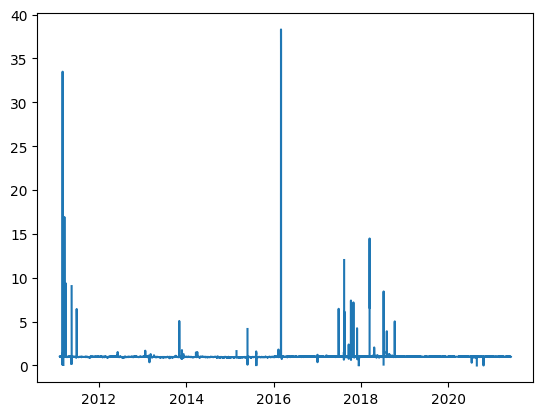

In [13]:
print(beta)

print(DF["Mxco"])
print(max(DF["Mxco"]))
plt.plot(DF["Mxco"])

C:\Users\baatz\AppData\Local\Temp\ipykernel_12828\470087725.py:137: UserWarning: The following kwargs were not used by contour: 'linestyle'
  contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
C:\Users\baatz\AppData\Local\Temp\ipykernel_12828\470087725.py:173: UserWarning: The following kwargs were not used by contour: 'linestyle'
  contour_lines = ax.contour(psi_range, Inc_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
C:\Users\baatz\AppData\Local\Temp\ipykernel_12828\470087725.py:209: UserWarning: The following kwargs were not used by contour: 'linestyle'
  contour_lines = ax.contour(omega_range, abs_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])


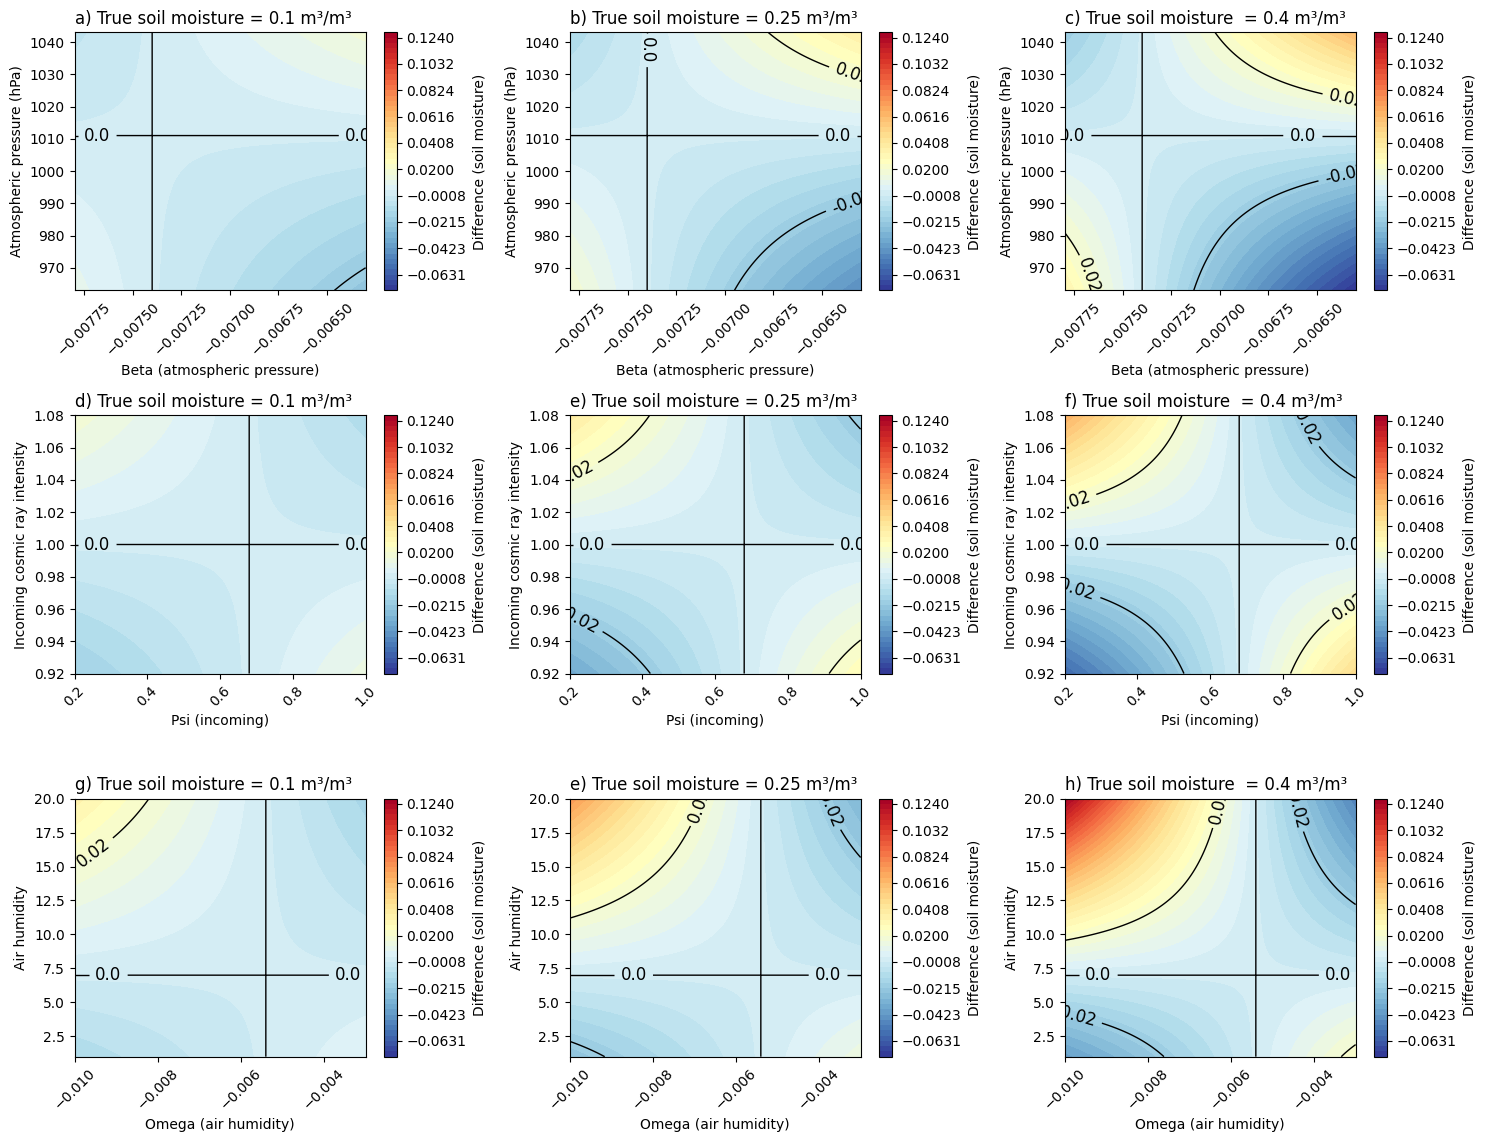

Save file as ./Figure_4_sensitivity_b1.png


In [14]:
my_prefix = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ', 'f) ', 'g) ', 'e) ', 'h) ']
pref_ct = 0
Inc_ref = 1.0  # Reference incoming cosmic ray intensity

psi_ref = 0.68
omega_ref = -0.0054
abs_ref = 7.0
ense_size = 500

# Define ranges for Inc and psi
Inc_range = np.linspace(0.92, 1.08, ense_size)
abs_range = np.linspace(1, 20, ense_size)

psi_range = np.linspace(0.2, 1.0, ense_size)
omega_range = np.linspace(-0.003, -0.01, ense_size)

# Initialize subplots
#fig, axes = plt.subplots(3, 4, figsize=(24, 16))
#SWC_refs = [0.1, 0.2, 0.3, 0.4]
#titles = ['SWC_ref = 0.1', 'SWC_ref = 0.2', 'SWC_ref = 0.3','SWC_ref = 0.4']

# Initialize subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
SWC_refs = [0.1, 0.25,  0.4]
titles = ['True soil moisture = 0.1 m³/m³', 'True soil moisture = 0.25 m³/m³', 'True soil moisture  = 0.4 m³/m³']

global_min = float('inf')
global_max = float('-inf')

# Plot for beta and P
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

    # Update global min and max values
    global_min = min(global_min, SWC_diff.min())
    global_max = max(global_max, SWC_diff.max())

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((ense_size,ense_size))

    # Calculate SWC for each combination of Inc and psi
    for i, Inc in enumerate(Inc_range):
        for j, psi in enumerate(psi_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi_ref)
            N_ij = Npih_ref / cor_coeff
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

    # Update global min and max values
    global_min = min(global_min, SWC_diff.min())
    global_max = max(global_max, SWC_diff.max())


# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((ense_size,ense_size))

    # Calculate SWC for each combination of Inc and psi
    for i, abs_val in enumerate(abs_range):
        for j, omega in enumerate(omega_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega_ref)
            N_ij = Npih_ref / cor_coeff
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

    # Update global min and max values
    global_min = min(global_min, SWC_diff.min())
    global_max = max(global_max, SWC_diff.max())

    
    
    
    

# Plot for beta and P
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

    # Plot the heatmap
    ax = axes[0, idx]
    c = ax.contourf(beta_range, P_range, SWC_diff, levels=np.linspace(global_min, global_max, 50), cmap='RdYlBu_r')
    fig.colorbar(c, ax=ax, label='Difference (soil moisture)')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    ax.set_xlabel('Beta (atmospheric pressure)')
    ax.set_ylabel('Atmospheric pressure (hPa)')
    ax.set_title(my_prefix[pref_ct]+titles[idx],loc="left")
    pref_ct = pref_ct + 1
    
# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((ense_size,ense_size))

    # Calculate SWC for each combination of Inc and psi
    for i, Inc in enumerate(Inc_range):
        for j, psi in enumerate(psi_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi_ref)
            N_ij = Npih_ref / cor_coeff
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

    # Plot the heatmap
    ax = axes[1, idx]
    c = ax.contourf(psi_range, Inc_range, SWC_diff, levels=np.linspace(global_min, global_max, 50), cmap='RdYlBu_r')
    fig.colorbar(c, ax=ax, label='Difference (soil moisture)')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(psi_range, Inc_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    ax.set_xlabel('Psi (incoming)')
    ax.set_ylabel('Incoming cosmic ray intensity')
    ax.set_title(my_prefix[pref_ct]+titles[idx],loc="left")
    pref_ct = pref_ct + 1
    
# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((ense_size,ense_size))

    # Calculate SWC for each combination of Inc and psi
    for i, abs_val in enumerate(abs_range):
        for j, omega in enumerate(omega_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega_ref)
            N_ij = Npih_ref / cor_coeff
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

    # Plot the heatmap
    ax = axes[2, idx]
    c = ax.contourf(omega_range, abs_range, SWC_diff, levels=np.linspace(global_min, global_max, 50), cmap='RdYlBu_r')
    fig.colorbar(c, ax=ax, label='Difference (soil moisture)')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(omega_range, abs_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['k','k', 'k'], linewidths=[1,1,1], linestyle=['--','-','--'])
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Omega (air humidity)')
    ax.set_ylabel('Air humidity')
    ax.set_title(my_prefix[pref_ct]+titles[idx],loc="left")
    pref_ct = pref_ct + 1
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



pngname="./Figure_4_sensitivity_b1.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')

